# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [7]:
# Import your libraries:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [8]:
#!pip show scikit-learn

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [10]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [11]:
websites.head(20)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,1,62,146,2,2.0,1


In [12]:
websites.shape

(1781, 21)

In [13]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [14]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [15]:
websites["Type"].value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [16]:
categorical_df = websites.select_dtypes(include=['object', 'category'])
for column in categorical_df.columns:
    print(categorical_df[column].value_counts())
    print()

URL
M0_109     1
B0_999     1
B0_2292    1
B0_2168    1
B0_2108    1
          ..
B0_104     1
M1_3       1
M0_53      1
M0_50      1
B0_676     1
Name: count, Length: 1781, dtype: int64

CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) O

1. What the dataset looks like?

The dataset is with 21 columns and 1781 rows.
The majority of columns are with non-null values but 6 have more than 100 NaN values, mainly the "WHOIS" columns


2. What are the data types?

Most of the columns are numerical (integer or float)
We have some with strings and 2 with date (that need to be parsed)

3. Which columns contain the features of the websites?


Probably these ones that don't have much missing values: 

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1

Eventualy these ones if they bring additional performance: 

SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139


4. Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

I thing the feature to predict is dtype with the malicious websites having a value of 1. It certainly needs to be converted as a boolean

5. Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

all the object columns seem to be categorical and not ordinal (no hierarchy)


In [17]:
websites.shape

(1781, 21)

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


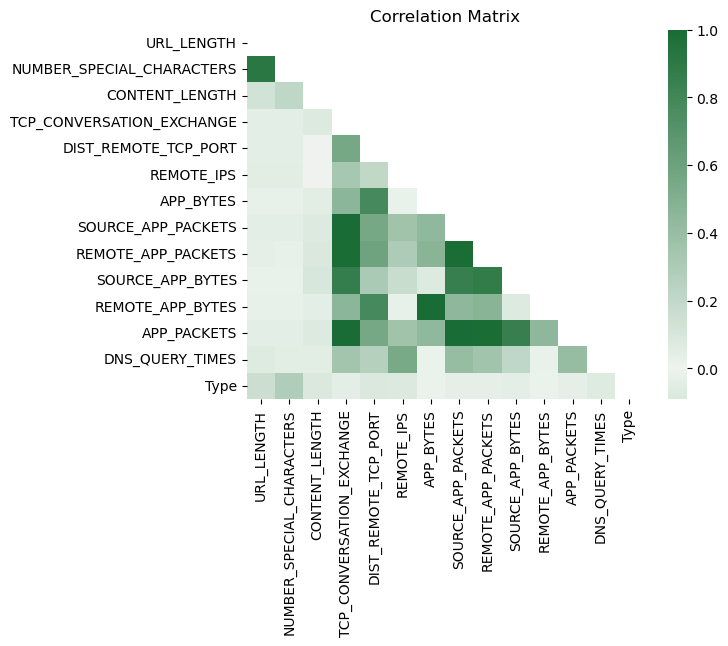

In [18]:
# Your code here
numeric_columns = websites.select_dtypes(include='number')
correlations_matrix = numeric_columns.corr() 
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool)) 
cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True) 
ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask) 
ax.set_title('Correlation Matrix') 
plt.show() 

We can remove: 
- NUMBER Special character 
- SOURCE APP PACKETS
- REMOTE APP PACKETS
- SOURCE APP BYTES
- TCP CONVERSATION EXCHANGE

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


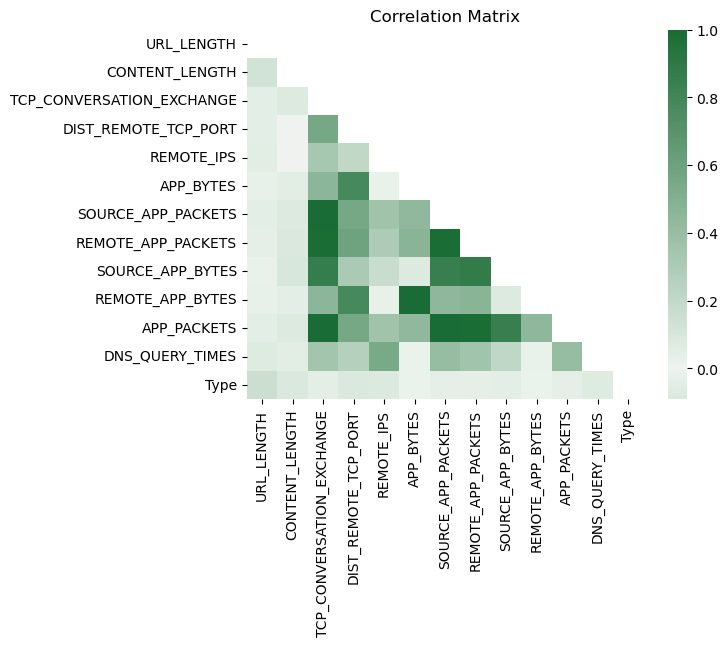

In [19]:
websites = websites.drop('NUMBER_SPECIAL_CHARACTERS', axis = 1)
numeric_columns = websites.select_dtypes(include='number')
correlations_matrix = numeric_columns.corr() 
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool)) 
cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True) 
ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask) 
ax.set_title('Correlation Matrix') 
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


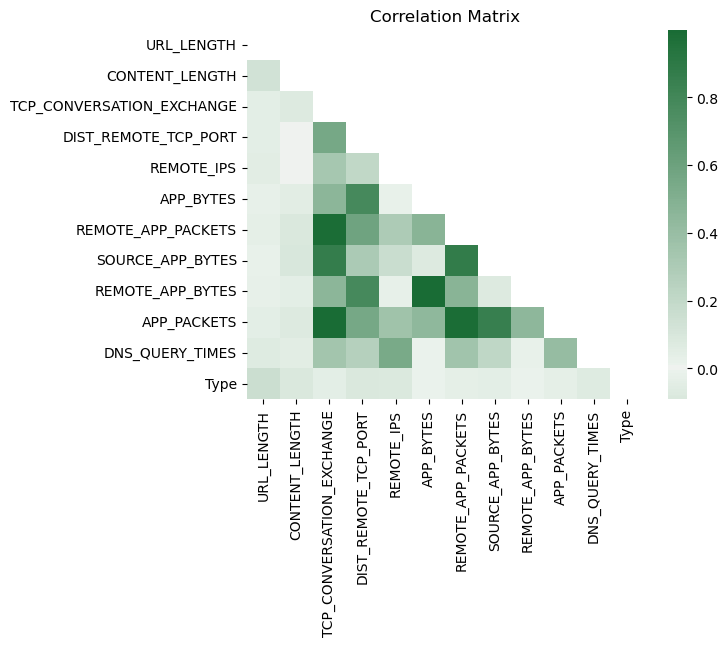

In [20]:
websites = websites.drop('SOURCE_APP_PACKETS', axis = 1)
numeric_columns = websites.select_dtypes(include='number')
correlations_matrix = numeric_columns.corr() 
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool)) 
cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True) 
ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask) 
ax.set_title('Correlation Matrix') 
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


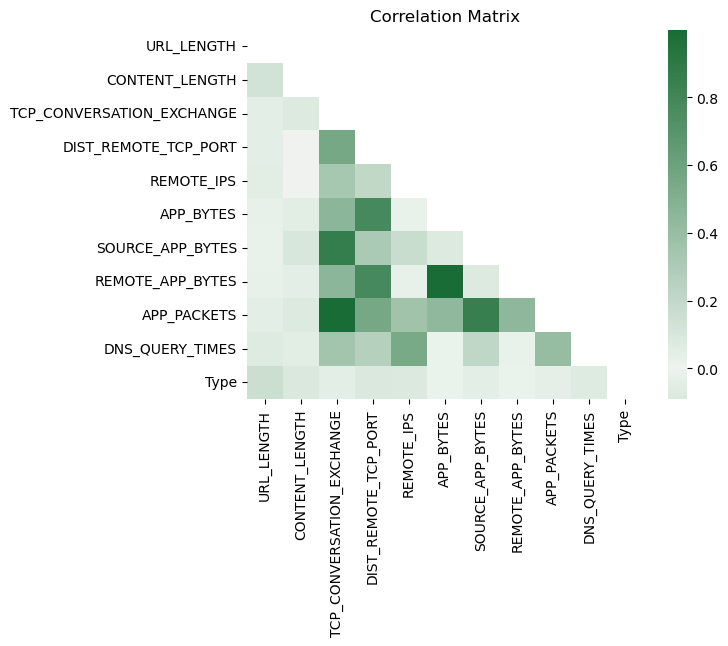

In [21]:
websites = websites.drop('REMOTE_APP_PACKETS', axis = 1)
numeric_columns = websites.select_dtypes(include='number')
correlations_matrix = numeric_columns.corr() 
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool)) 
cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True) 
ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask) 
ax.set_title('Correlation Matrix') 
plt.show()


/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


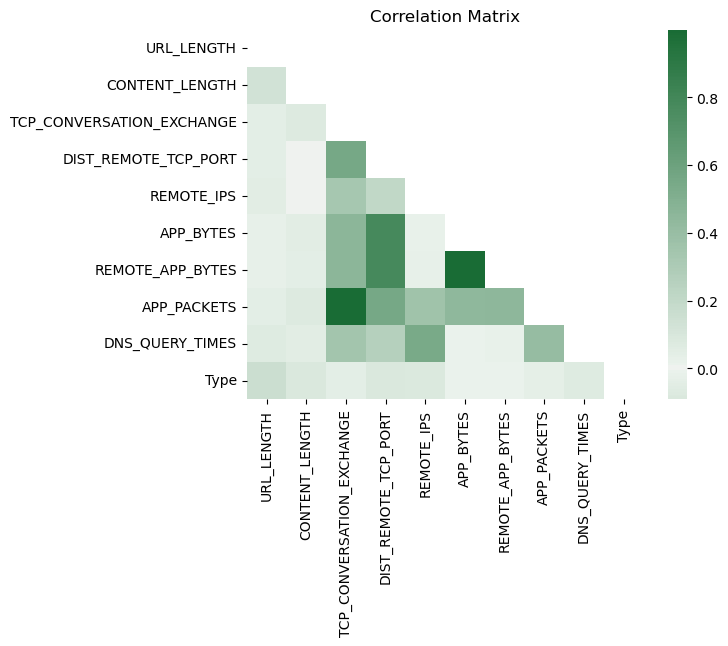

In [22]:
websites = websites.drop('SOURCE_APP_BYTES', axis = 1)
numeric_columns = websites.select_dtypes(include='number')
correlations_matrix = numeric_columns.corr() 
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool)) 
cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True) 
ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask) 
ax.set_title('Correlation Matrix') 
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


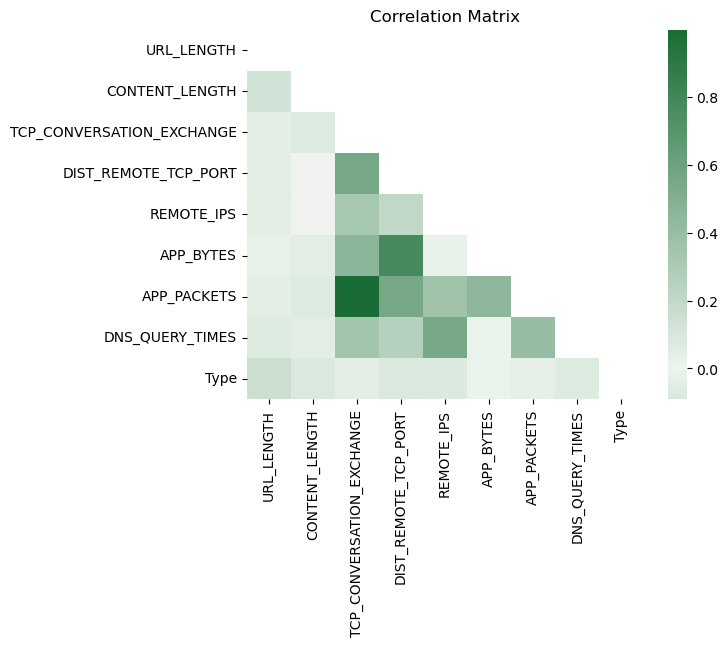

In [23]:
websites = websites.drop('REMOTE_APP_BYTES', axis = 1)
numeric_columns = websites.select_dtypes(include='number')
correlations_matrix = numeric_columns.corr() 
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool)) 
cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True) 
ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask) 
ax.set_title('Correlation Matrix') 
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


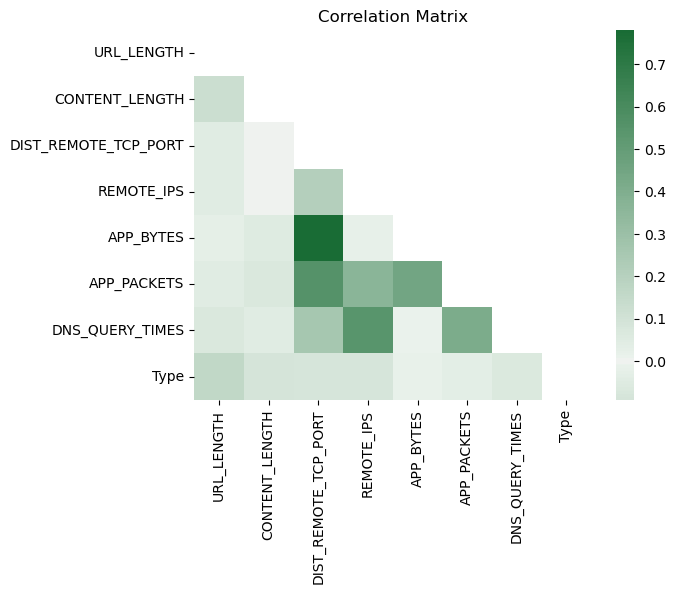

In [24]:
websites = websites.drop('TCP_CONVERSATION_EXCHANGE', axis = 1)
numeric_columns = websites.select_dtypes(include='number')
correlations_matrix = numeric_columns.corr() 
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool)) 
cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True) 
ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask) 
ax.set_title('Correlation Matrix') 
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [25]:

websites.isna().sum()

URL                       0
URL_LENGTH                0
CHARSET                   7
SERVER                  176
CONTENT_LENGTH          812
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [26]:
# Your code here
websites = websites.drop('CONTENT_LENGTH',axis = 1)
websites.dropna(subset=['CHARSET', 'SERVER', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE','DNS_QUERY_TIMES'], inplace=True)

In [27]:
websites['WHOIS_COUNTRY'].fillna('Unknown', inplace=True)
websites['WHOIS_STATEPRO'].fillna('Unknown', inplace=True)

Handling of missing values: 
- drop the column "CONTENT_LENGTH" that have too many missing values.
- drop the empty rows in 'CHARSET', 'SERVER', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE' and that have 10% or so of missinf values
- replace for country and state by unknown since there is too much missing

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [28]:
# Examine missing values in each column
websites.isna().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [29]:
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US                957
Unknown           157
CA                 75
ES                 63
AU                 34
PA                 21
GB                 17
JP                 11
UK                 10
CN                  9
CZ                  9
FR                  8
IN                  8
CH                  6
[u'GB'; u'UK']      5
NL                  5
ru                  4
BS                  4
PH                  4
KR                  4
AT                  4
HK                  3
SC                  3
SE                  3
BE                  3
TR                  3
DE                  3
us                  3
KY                  3
IL                  2
UY                  2
Cyprus              2
RU                  2
UA                  2
KG                  2
NO                  2
SI                  2
UG                  1
se                  1
LV                  1
PK                  1
IT                  1
BY                  1
AE                  1
IE                

In [30]:
websites['WHOIS_COUNTRY'].replace({'GB': 'UK', 'United Kingdom': 'UK', "[u'GB'; u'UK']": 'UK', 'us': 'US', 'Cyprus': 'CY', 'se':'SE','ru': 'RU'}, inplace=True)

In [31]:
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US         960
Unknown    157
CA          75
ES          63
AU          34
UK          32
PA          21
JP          11
CN           9
CZ           9
FR           8
IN           8
RU           6
CH           6
NL           5
KR           4
PH           4
AT           4
SE           4
BS           4
KY           3
SC           3
BE           3
HK           3
TR           3
DE           3
UA           2
KG           2
NO           2
IL           2
SI           2
UY           2
CY           2
BY           1
IE           1
AE           1
LU           1
IT           1
PK           1
UG           1
LV           1
Name: count, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

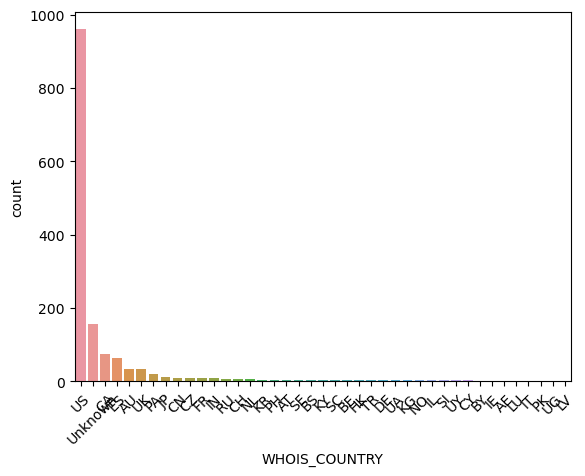

In [32]:
# Your code here
country_counts = websites['WHOIS_COUNTRY'].value_counts()
sns.countplot(data=websites, x='WHOIS_COUNTRY', order=country_counts.index)
plt.xticks(rotation=45)
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [33]:

country_counts = websites['WHOIS_COUNTRY'].value_counts()
top_10_countries = country_counts[:10].index
mask = websites['WHOIS_COUNTRY'].isin(top_10_countries)
websites.loc[~mask, 'WHOIS_COUNTRY'] = 'OTHER'
websites['WHOIS_COUNTRY'].value_counts()


WHOIS_COUNTRY
US         960
Unknown    157
OTHER       93
CA          75
ES          63
AU          34
UK          32
PA          21
JP          11
CN           9
CZ           9
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [34]:
# Your code here
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],axis = 1)
display(websites.head())
websites.isna().sum()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,B0_113,17,ISO-8859-1,nginx,US,22,3,3812,39,8.0,0
5,B0_2064,18,UTF-8,nginx,OTHER,6,9,894,11,0.0,0
6,B0_462,18,iso-8859-1,Apache/2,US,0,3,1189,14,2.0,0
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0.0,0
10,B0_1013,20,utf-8,Apache,US,0,0,0,0,0.0,0


URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [35]:
# Your code here
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [36]:
websites = websites.drop('URL',axis = 1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [37]:
websites['CHARSET'].value_counts()

CHARSET
UTF-8           578
ISO-8859-1      322
utf-8           319
us-ascii        130
iso-8859-1      112
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [38]:
websites['CHARSET'].replace({'ISO-8859': 'ISO-8859-1', 'iso-8859': 'ISO-8859-1','windows-1252': 'windows-1251'}, inplace=True)
websites=websites[websites['CHARSET'] != 'windows-1251']
websites['CHARSET'].value_counts()

CHARSET
UTF-8         578
ISO-8859-1    323
utf-8         319
us-ascii      130
iso-8859-1    112
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [39]:

value_counts = websites['SERVER'].value_counts()
more_frequent = value_counts.head(25)
less_frequent = value_counts.tail(25)
print("More frequent values:")
print(more_frequent)
print("\nLess frequent values:")
print(less_frequent)

More frequent values:
SERVER
Apache                                                                                       356
nginx                                                                                        160
Microsoft-HTTPAPI/2.0                                                                        103
cloudflare-nginx                                                                              91
GSE                                                                                           49
Server                                                                                        49
Microsoft-IIS/7.5                                                                             48
YouTubeFrontEnd                                                                               41
nginx/1.12.0                                                                                  34
ATS                                                                                           30
A

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [40]:
websites.loc[websites['SERVER'].str.contains('Microsoft', case=False), 'SERVER'] = 'Microsoft'
websites.loc[websites['SERVER'].str.contains('Apache', case=False), 'SERVER'] = 'Apache'
websites.loc[websites['SERVER'].str.contains('nginx', case=False), 'SERVER'] = 'nginx'
websites.loc[~websites['SERVER'].isin(['Microsoft', 'Apache', 'nginx']), 'SERVER'] = 'OTHER'


In [41]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()
value_counts = websites['SERVER'].value_counts()
more_frequent = value_counts.head(25)
less_frequent = value_counts.tail(25)
print("More frequent values:")
print(more_frequent)
print("\nLess frequent values:")
print(less_frequent)

More frequent values:
SERVER
Apache       591
nginx        372
OTHER        319
Microsoft    180
Name: count, dtype: int64

Less frequent values:
SERVER
Apache       591
nginx        372
OTHER        319
Microsoft    180
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [42]:

websites_categorical = websites.select_dtypes(object)
websites_dummy = pd.get_dummies(websites_categorical, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [43]:
# Your code here
websites_dummy.head()
websites_dummy.isna().sum()

CHARSET_UTF-8            0
CHARSET_iso-8859-1       0
CHARSET_us-ascii         0
CHARSET_utf-8            0
SERVER_Microsoft         0
SERVER_OTHER             0
SERVER_nginx             0
WHOIS_COUNTRY_CA         0
WHOIS_COUNTRY_CN         0
WHOIS_COUNTRY_CZ         0
WHOIS_COUNTRY_ES         0
WHOIS_COUNTRY_JP         0
WHOIS_COUNTRY_OTHER      0
WHOIS_COUNTRY_PA         0
WHOIS_COUNTRY_UK         0
WHOIS_COUNTRY_US         0
WHOIS_COUNTRY_Unknown    0
dtype: int64

In [44]:
websites_numeric = websites.select_dtypes(include='number')
websites_numeric.isna().sum()

URL_LENGTH              0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

In [45]:
websites_prepared = pd.concat([websites_dummy, websites_numeric], axis=1)
websites_prepared.head()

,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,SERVER_Microsoft,SERVER_OTHER,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,...,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,WHOIS_COUNTRY_Unknown,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,False,False,False,False,False,False,True,False,False,False,...,False,True,False,17,22,3,3812,39,8.0,0
5,True,False,False,False,False,False,True,False,False,False,...,False,False,False,18,6,9,894,11,0.0,0
6,False,True,False,False,False,False,False,False,False,False,...,False,True,False,18,0,3,1189,14,2.0,0
7,False,False,True,False,True,False,False,False,False,False,...,False,True,False,19,0,0,0,0,0.0,0
10,False,False,False,True,False,False,False,False,False,False,...,False,True,False,20,0,0,0,0,0.0,0


In [46]:
websites_prepared.isna().sum()

CHARSET_UTF-8            0
CHARSET_iso-8859-1       0
CHARSET_us-ascii         0
CHARSET_utf-8            0
SERVER_Microsoft         0
SERVER_OTHER             0
SERVER_nginx             0
WHOIS_COUNTRY_CA         0
WHOIS_COUNTRY_CN         0
WHOIS_COUNTRY_CZ         0
WHOIS_COUNTRY_ES         0
WHOIS_COUNTRY_JP         0
WHOIS_COUNTRY_OTHER      0
WHOIS_COUNTRY_PA         0
WHOIS_COUNTRY_UK         0
WHOIS_COUNTRY_US         0
WHOIS_COUNTRY_Unknown    0
URL_LENGTH               0
DIST_REMOTE_TCP_PORT     0
REMOTE_IPS               0
APP_BYTES                0
APP_PACKETS              0
DNS_QUERY_TIMES          0
Type                     0
dtype: int64

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [47]:
from sklearn.model_selection import train_test_split

X = websites_prepared.drop('Type', axis=1)
y = websites_prepared[['Type']]
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2606)

scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X.columns)

# we can immediately transform the X_test as well
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)





In [48]:
X.isna().sum()

CHARSET_UTF-8            0
CHARSET_iso-8859-1       0
CHARSET_us-ascii         0
CHARSET_utf-8            0
SERVER_Microsoft         0
SERVER_OTHER             0
SERVER_nginx             0
WHOIS_COUNTRY_CA         0
WHOIS_COUNTRY_CN         0
WHOIS_COUNTRY_CZ         0
WHOIS_COUNTRY_ES         0
WHOIS_COUNTRY_JP         0
WHOIS_COUNTRY_OTHER      0
WHOIS_COUNTRY_PA         0
WHOIS_COUNTRY_UK         0
WHOIS_COUNTRY_US         0
WHOIS_COUNTRY_Unknown    0
URL_LENGTH               0
DIST_REMOTE_TCP_PORT     0
REMOTE_IPS               0
APP_BYTES                0
APP_PACKETS              0
DNS_QUERY_TIMES          0
dtype: int64

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [49]:
# Your code here:

model = LogisticRegression(random_state=0)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [50]:
# Your code here:

model.fit(X_train, y_train)

LogisticRegression(random_state=0)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [51]:
y_pred = model.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.931740614334471

In [53]:
precision_score(y_test, y_pred)

1.0

In [54]:
recall_score(y_test, y_pred)

0.5

In [55]:
confusion_matrix(y_pred, y_test)

array([[253,  20],
       [  0,  20]])

<Axes: >

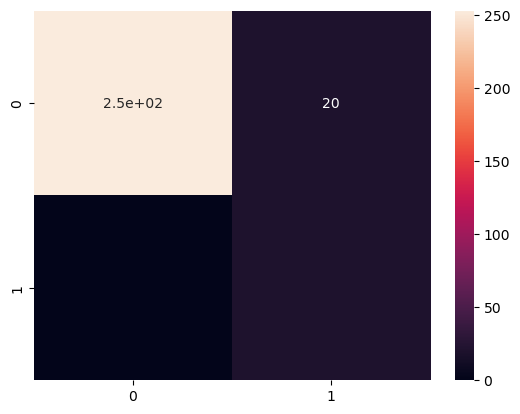

In [56]:
# ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

What are your thoughts on the performance of the model? Write your conclusions below.

### Conclusions: 
The model is not good even if accuracy score seems not bad; the main problem is a very poor level of recall 



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [65]:
KN3_model = KNeighborsClassifier(n_neighbors=3)
KN3_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [66]:
y_pred_KN3 = KN3_model.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred_KN3)

0.9419795221843004

In [68]:
precision_score(y_test, y_pred_KN3)

0.896551724137931

In [69]:
recall_score(y_test, y_pred_KN3)

0.65

In [70]:
confusion_matrix(y_pred_KN3, y_test)

array([[250,  14],
       [  3,  26]])

<Axes: >

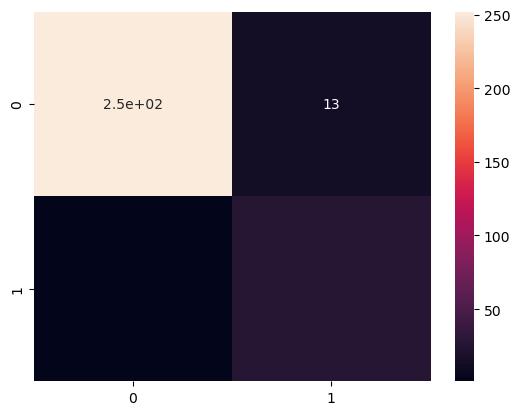

In [71]:
sns.heatmap(confusion_matrix(y_pred_KN, y_test), annot=True)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [72]:
KN5_model = KNeighborsClassifier(n_neighbors=5)
KN5_model.fit(X_train, y_train)


KNeighborsClassifier()

In [73]:
y_pred_KN5 = KN5_model.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred_KN5)

0.9522184300341296

In [75]:
precision_score(y_test, y_pred_KN5)

0.9642857142857143

In [76]:
recall_score(y_test, y_pred_KN5)

0.675

In [77]:
confusion_matrix(y_pred_KN5, y_test)

array([[252,  13],
       [  1,  27]])

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

Yes it make a slightly improvement in the accuracy score and the other ones too. We see that alsor in the matrix with a few more items that are correctly predicted


#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here